In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from tqdm import tqdm

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

music_data = pd.read_csv('music_data.csv')
music_data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [2]:
music_data.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [3]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [4]:
music_data.shape

(2000, 18)

# Plot of null values

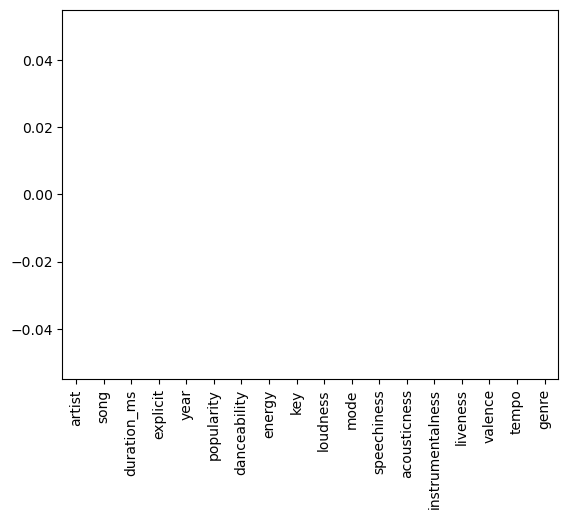

In [5]:
music_data.isnull().sum().plot.bar()
plt.show()

# Checking for numerical columns

In [6]:
music_data.select_dtypes(np.number)

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,211160,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053
1,167066,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726
2,250546,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859
3,224493,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992
4,200560,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,181026,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958
1996,178426,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994
1997,200593,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984
1998,171029,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998


# Convert the explicit boolean column into 1s and 0s

In [7]:
music_data["explicit"] = music_data["explicit"].astype(int)

In [8]:
music_data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,0,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,0,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,0,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,0,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,0,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


# Correlation matrix

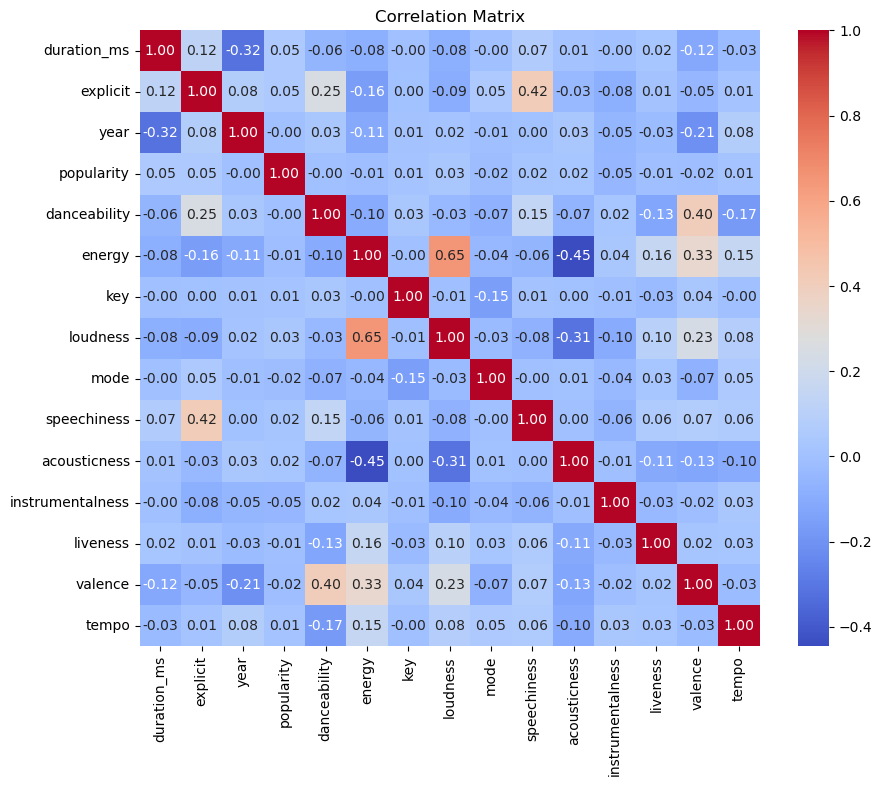

In [10]:
import seaborn as sns  

numeric_data = music_data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# visualizing trend in music against the years for independent features

In [11]:
from sklearn.preprocessing import StandardScaler
import plotly.express as px

100%|██████████| 13/13 [00:04<00:00,  2.94it/s]


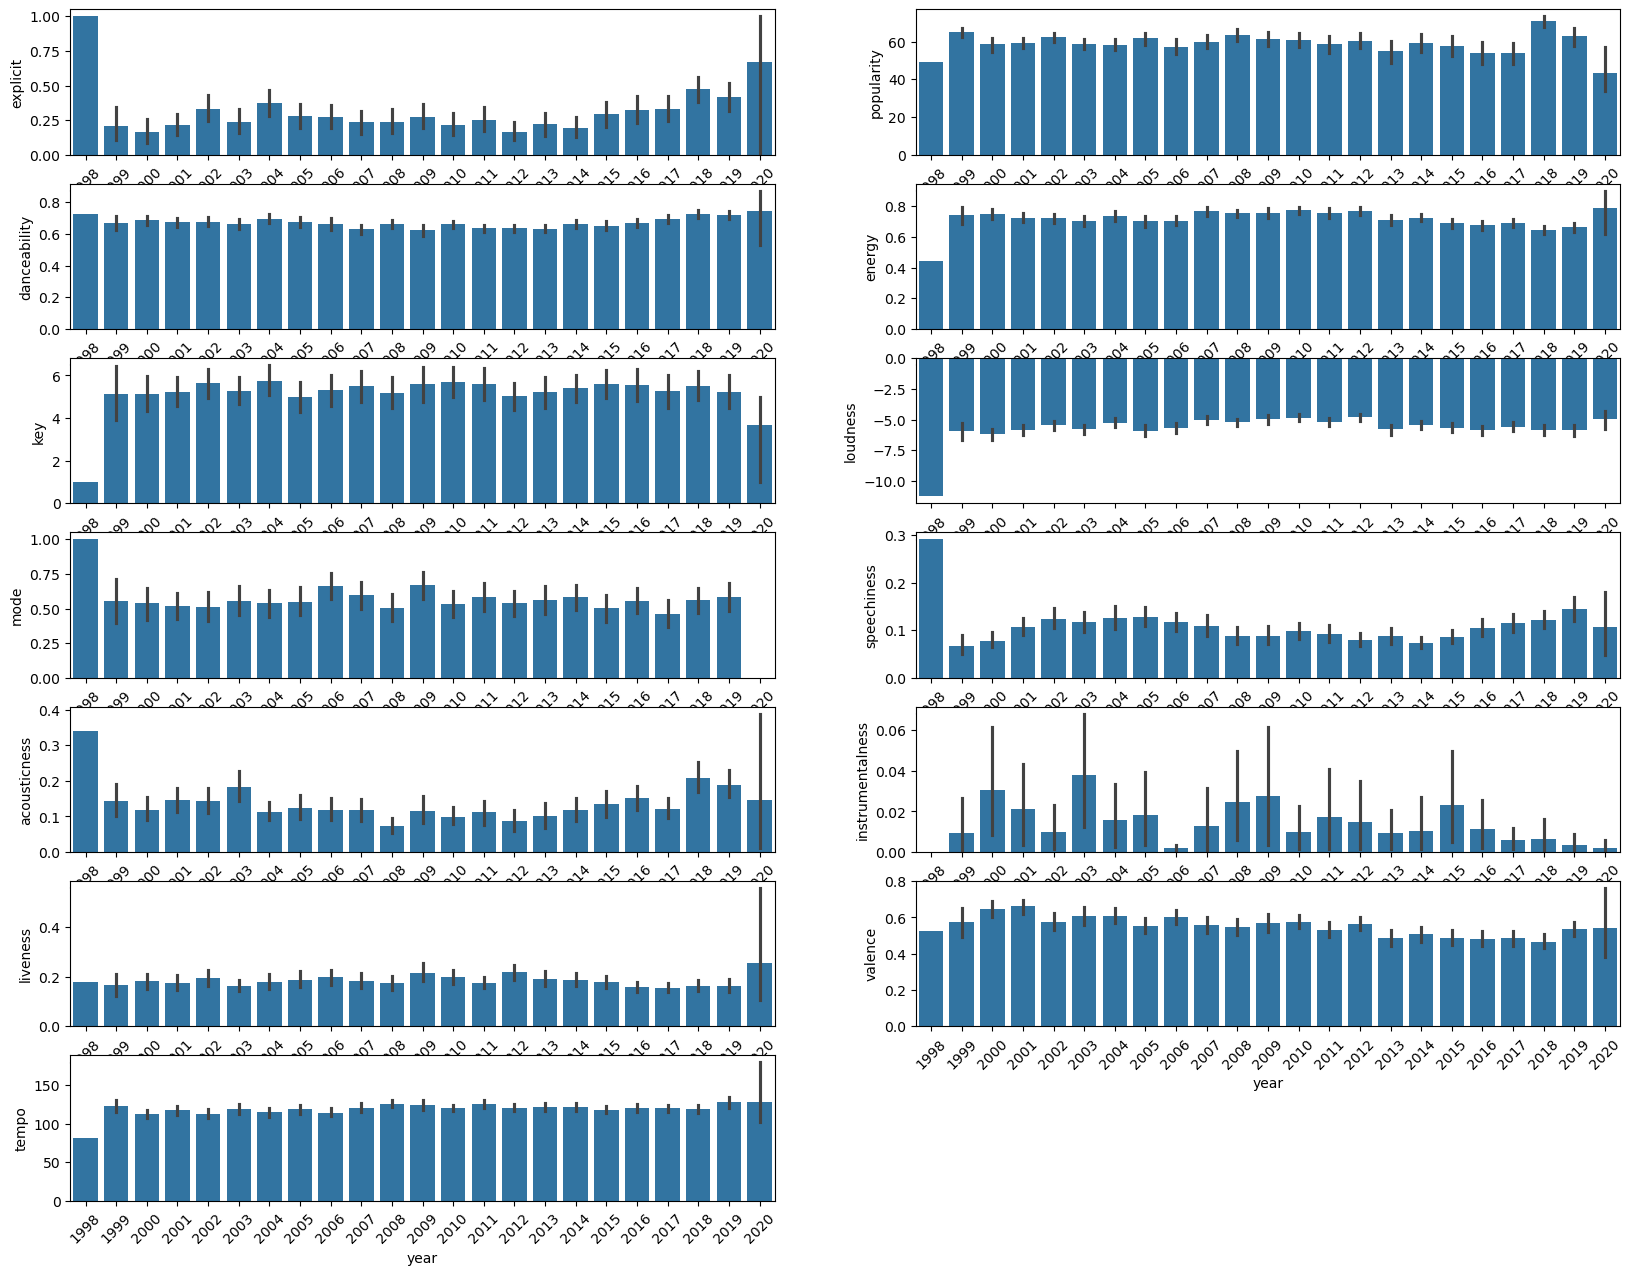

In [12]:
visual_data = music_data.drop(columns=['song', 'artist', 'year', 'genre'])

plt.figure(figsize=(20, 20))
for i in tqdm(np.arange(1, len(visual_data.columns))):
    plt.subplot(9, 2, i)
    sb.barplot(x=music_data.year,y=visual_data[visual_data.columns[i]])
    plt.xticks(rotation=45);
plt.show()

# Heat map

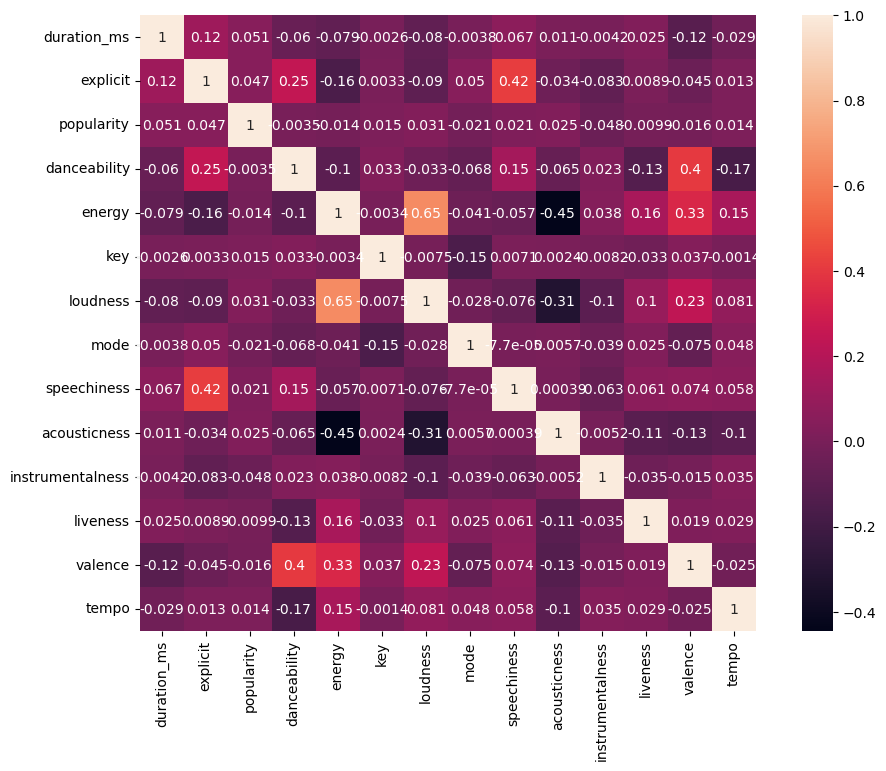

In [13]:
plt.subplots(figsize=(12, 8))
sb.heatmap(visual_data.corr(), annot=True, square=True)
plt.show()

# ENCODING THE MUSIC GENRE COLUMN

In [14]:
from sklearn.preprocessing import OneHotEncoder
unique_genres = set()
for genre_list in music_data["genre"]:
    genres = genre_list.split(",")
    for genre in genres:
        unique_genres.add(genre)

# Create a one-hot encoding for the genre column
encoder = OneHotEncoder()
encoder.fit([[genre] for genre in unique_genres])

# Encode the genre data
encoded_genres = []
for genres in music_data["genre"]:
    genres = genres.split(",")
    one_hot = [0 if genre not in genres else 1 for genre in unique_genres]
    encoded_genres.append(one_hot)

# Normalizing the columns

In [15]:
import os
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [16]:
def normalize_column(col):
    max_d = music_data[col].max()
    min_d = music_data[col].min()
    music_data[col] = (music_data[col] - min_d)/(max_d - min_d)

In [17]:
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = music_data.select_dtypes(include=num_types)

for col in num.columns:
    if col != 'year':
        normalize_column(col)

# Boxplot visualization to identify outliers

<Axes: >

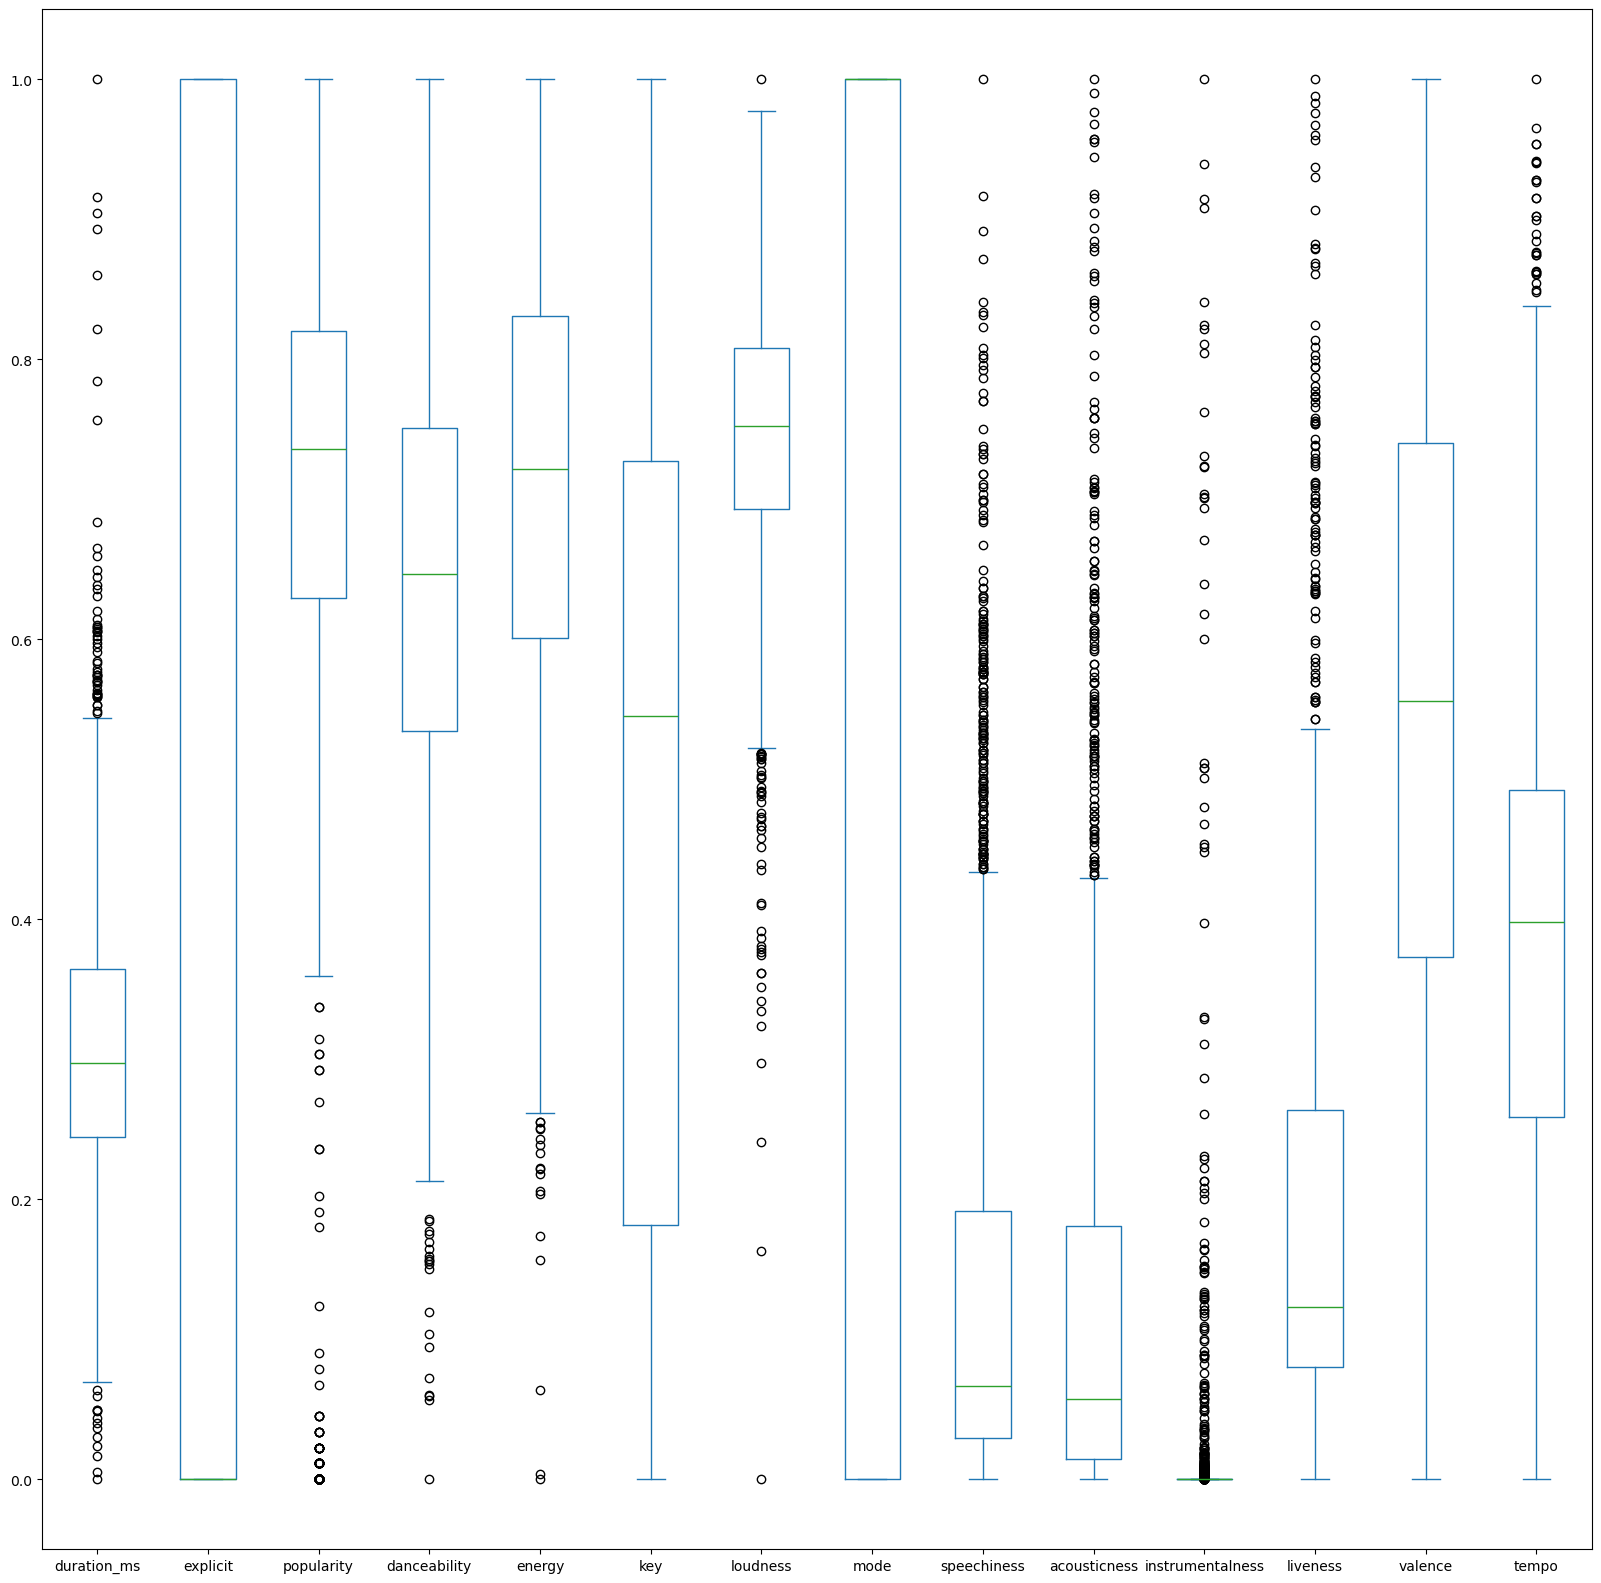

In [18]:
music_data.select_dtypes(np.number).drop(columns = ['year']).plot(kind='box' ,figsize=(20, 20) ,fontsize=10)

# Scatterplot visualization to see patterns of interest

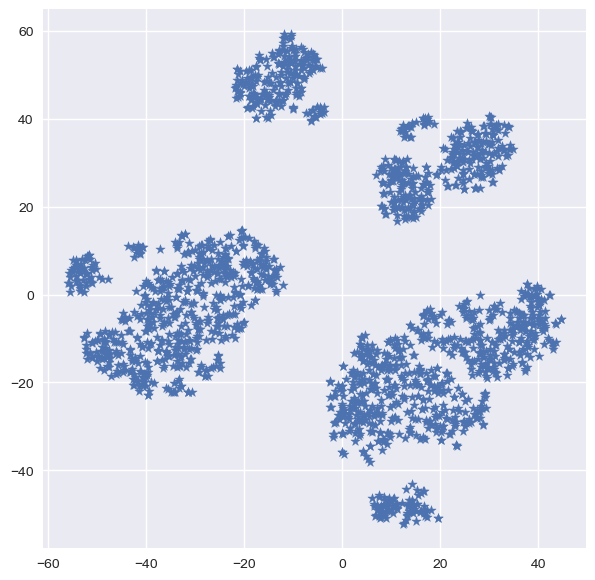

In [20]:
model = TSNE(n_components = 2, random_state = 0)
music_data_modified = music_data.select_dtypes(np.number).drop(columns=['year'])
tsne_data = model.fit_transform(music_data_modified)
plt.style.use('seaborn-v0_8')
plt.figure(figsize = (7, 7))
plt.scatter(tsne_data[:,0], tsne_data[:,1],  marker= '*')
plt.show()

# JOINING THE ENCODED GENRE COLUMNS WITH THE ORIGINAL DATASET

In [21]:
encoded_genres_df = pd.DataFrame(encoded_genres)

encoded_genres_df.columns = unique_genres
encoded_genres_df

,latin,pop,jazz,metal,hip hop,Dance/Electronic,metal,Folk/Acoustic,pop,easy listening,...,R&B,blues,country,rock,latin,rock,R&B,set(),Dance/Electronic,country
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1998,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:


# Concatenate the encoded genres DataFrame with the original dataset
music_data = pd.concat([music_data, encoded_genres_df], axis=1)

# View the dataset with the encoded genres
music_data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,R&B,blues,country,rock,latin,rock,R&B,set(),Dance/Electronic,country
0,Britney Spears,Oops!...I Did It Again,0.264478,0.0,2000,0.865169,0.735225,0.825230,0.090909,0.744639,...,0,0,0,0,0,0,0,0,0,0
1,blink-182,All The Small Things,0.145673,0.0,1999,0.887640,0.360520,0.891961,0.000000,0.770630,...,0,0,0,1,0,0,0,0,0,0
2,Faith Hill,Breathe,0.370598,0.0,1999,0.741573,0.472813,0.467217,0.636364,0.568584,...,0,0,0,0,0,0,0,0,0,1
3,Bon Jovi,It's My Life,0.300402,0.0,2000,0.876404,0.498818,0.908908,0.000000,0.812877,...,0,0,0,1,0,0,0,0,0,0
4,*NSYNC,Bye Bye Bye,0.235918,0.0,2000,0.730337,0.573286,0.924796,0.727273,0.776164,...,0,0,0,0,0,0,0,0,0,0


# importing the KMeans clustering algorithm that is used to generate categories from music relations

In [23]:
import pickle

In [24]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10)
cat = km.fit_predict(num)
pickle.dump(km , open('knn_model.pk1' , 'wb'))
music_data['cat'] = cat
normalize_column('cat')

In [25]:
music_data.cat[:10]

0    1.000000
1    0.333333
2    0.000000
3    0.666667
4    0.111111
5    0.000000
6    0.444444
7    0.888889
8    0.888889
9    0.444444
Name: cat, dtype: float64

In [26]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
X = music_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
pickle.dump(km , open('cluster_model.pk1' , 'wb'))
music_data['cluster'] = cluster_pipeline.predict(X)

# Visualizing the Clusters with t-SNE

In [27]:
tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = music_data['genre']
projection['cluster'] = music_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.077s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 1.708391
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.072319
[t-SNE] KL divergence after 1000 iterations: 1.136814


# Splitting the data into train, test and validation sets

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X = music_data.select_dtypes(np.number).drop(columns = ['cat','cluster','year']).copy()
y = music_data['cluster']

In [29]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, random_state=0)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print('X_train= ',X_train.shape), print('y_train= ', y_train.shape)
print('x_train= ',X_valid.shape), print('y_valid= ',y_valid.shape)
print('x_test=  ',X_test.shape), print('y_test=  ',y_test.shape)

X_train=  (1600, 39)
y_train=  (1600,)
x_train=  (200, 39)
y_valid=  (200,)
x_test=   (200, 39)
y_test=   (200,)


(None, None)

# using various values of K we shall train our model

In [30]:
knn1= KNeighborsClassifier(metric='cosine', algorithm='brute', n_neighbors=1)
knn5= KNeighborsClassifier(metric='cosine', algorithm='brute', n_neighbors=5)
knn10= KNeighborsClassifier(metric='cosine', algorithm='brute', n_neighbors=10)

# fitted with both the training and validation data then training data again to learn different patterns and prevent bias

In [31]:
model_knn5 = knn5.fit(X_train, y_train)
pickle.dump(model_knn5 , open('knn5Model.pk1' , 'wb'))
knn1.fit(X_train, y_train)
knn10.fit(X_train, y_train)

knn5.fit(X_valid, y_valid)
knn1.fit(X_valid, y_valid)
knn10.fit(X_valid, y_valid)

knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)
knn10.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_valid)
y_pred_1 = knn1.predict(X_valid)
y_pred_10 = knn1.predict(X_valid)

In [32]:
X_valid

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,R&B,blues,country,rock,latin,rock,R&B,set(),Dance/Electronic,country
1947,0.222654,1.0,0.775281,0.783688,0.728842,0.636364,0.874988,1.0,0.111975,0.109614,...,0,0,0,0,0,0,0,0,0,0
223,0.230637,0.0,0.685393,0.653664,0.888783,0.000000,0.928155,0.0,0.089544,0.039018,...,0,0,0,0,0,0,0,0,0,0
1074,0.254921,0.0,0.685393,0.602837,0.854888,0.909091,0.850973,1.0,0.019718,0.050186,...,0,0,0,0,0,0,0,0,0,0
259,0.315275,0.0,0.696629,0.715130,0.840059,0.090909,0.752495,0.0,0.013929,0.003177,...,0,0,0,0,0,0,0,0,0,0
762,0.345667,1.0,0.853933,0.323877,0.388836,0.636364,0.323649,0.0,0.025507,0.137278,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1717,0.319405,1.0,0.865169,0.478723,0.559369,0.181818,0.585137,1.0,0.010130,0.026825,...,0,0,0,0,0,0,0,0,0,0
511,0.336003,1.0,0.853933,0.425532,0.674823,0.090909,0.683961,1.0,0.699711,0.032973,...,0,0,0,0,0,0,0,0,0,0
887,0.250575,0.0,0.573034,0.365248,0.901493,0.272727,0.776460,1.0,0.037265,0.019550,...,0,0,0,0,0,0,0,0,0,0
1374,0.234695,0.0,0.853933,0.618203,0.870776,0.090909,0.866093,1.0,0.042149,0.023239,...,0,0,0,0,0,0,0,0,0,0


In [33]:
y_pred_5

array([4, 1, 0, 0, 9, 2, 2, 3, 1, 0, 4, 7, 2, 2, 7, 1, 1, 4, 2, 3, 1, 2,
       1, 7, 1, 2, 7, 2, 5, 4, 0, 1, 1, 2, 2, 7, 7, 4, 2, 1, 7, 7, 1, 7,
       5, 4, 0, 1, 1, 7, 5, 1, 4, 5, 5, 1, 0, 0, 1, 2, 5, 1, 2, 5, 0, 5,
       1, 2, 1, 1, 7, 1, 1, 4, 1, 5, 1, 5, 2, 4, 1, 0, 1, 0, 5, 2, 2, 0,
       1, 3, 0, 4, 5, 7, 5, 1, 1, 1, 1, 1, 1, 5, 5, 5, 0, 1, 4, 1, 7, 5,
       1, 5, 1, 4, 7, 5, 2, 4, 2, 1, 7, 4, 1, 2, 2, 5, 1, 2, 1, 2, 4, 1,
       0, 1, 2, 1, 0, 7, 1, 3, 2, 1, 2, 7, 1, 5, 1, 4, 2, 2, 5, 1, 2, 1,
       3, 5, 1, 1, 1, 7, 7, 0, 4, 4, 5, 5, 1, 7, 0, 4, 1, 1, 1, 7, 1, 4,
       7, 2, 7, 2, 1, 1, 1, 3, 2, 1, 0, 3, 2, 2, 1, 0, 0, 5, 5, 2, 2, 1,
       1, 5])

# accuracy score

In [34]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_valid, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_valid, y_pred_1)*100)
print("Accuracy with k=10", accuracy_score(y_valid, y_pred_10)*100)

Accuracy with k=5 95.5
Accuracy with k=1 94.5
Accuracy with k=10 94.5


# confusion matrix

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_valid, y_pred_1))
print(confusion_matrix(y_valid, y_pred_5))
print(confusion_matrix(y_valid, y_pred_10))

[[20  0  0  0  0  0  0  0  0]
 [ 0 65  0  0  0  0  0  0  0]
 [ 0  0 29  0  4  0  0  1  0]
 [ 0  0  0  7  0  0  0  0  0]
 [ 0  1  4  0 18  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  0]
 [ 0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0 22  0]
 [ 0  0  0  0  0  0  0  0  1]]
[[20  0  0  0  0  0  0  0  0]
 [ 0 64  0  0  0  1  0  0  0]
 [ 0  0 32  0  1  0  0  1  0]
 [ 0  0  0  7  0  0  0  0  0]
 [ 0  0  4  0 19  0  0  0  0]
 [ 0  1  0  0  0 26  0  0  0]
 [ 0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0 22  0]
 [ 0  0  0  0  0  0  0  0  1]]
[[20  0  0  0  0  0  0  0  0]
 [ 0 65  0  0  0  0  0  0  0]
 [ 0  0 29  0  4  0  0  1  0]
 [ 0  0  0  7  0  0  0  0  0]
 [ 0  1  4  0 18  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  0]
 [ 0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0 22  0]
 [ 0  0  0  0  0  0  0  0  1]]


# Classification report

In [36]:
print(classification_report(y_valid, y_pred_1))
print(classification_report(y_valid, y_pred_5))
print(classification_report(y_valid, y_pred_10))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.98      1.00      0.99        65
           2       0.88      0.85      0.87        34
           3       1.00      1.00      1.00         7
           4       0.82      0.78      0.80        23
           5       0.96      1.00      0.98        27
           6       0.00      0.00      0.00         1
           7       0.96      1.00      0.98        22
           9       1.00      1.00      1.00         1

    accuracy                           0.94       200
   macro avg       0.84      0.85      0.85       200
weighted avg       0.94      0.94      0.94       200

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.98      0.98      0.98        65
           2       0.89      0.94      0.91        34
           3       1.00      1.00      1.00         7
           4       0.95 

# Visualizing the prediction

In [37]:
tsne_model = TSNE(n_components = 2, random_state = 0)
tsne_data_X_valid = tsne_model.fit_transform(X_test)

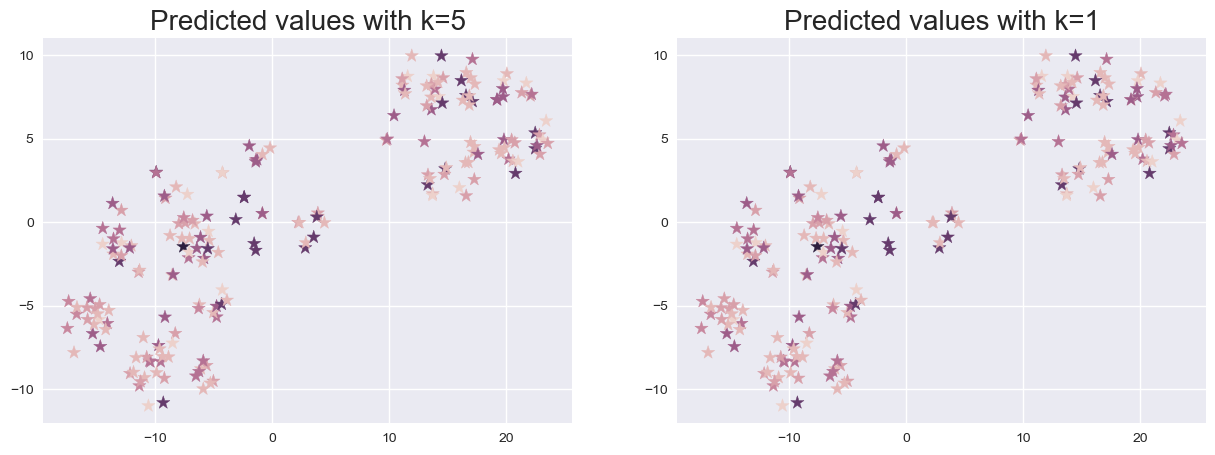

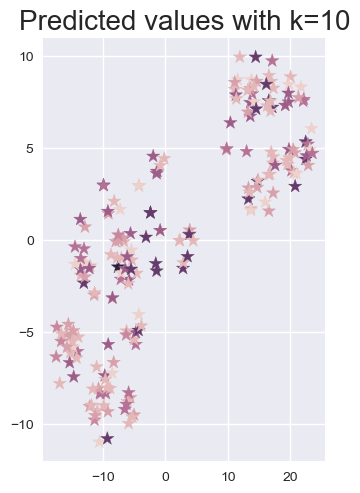

In [38]:
cmap = sb.cubehelix_palette(as_cmap=True)
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(tsne_data_X_valid[:,0], tsne_data_X_valid[:,1], c=y_pred_5, marker= '*', s=100, cmap=cmap)
plt.title("Predicted values with k=5", fontsize=20)
plt.subplot(1,2,2)
plt.scatter(tsne_data_X_valid[:,0], tsne_data_X_valid[:,1], c=y_pred_1, marker= '*', s=100, cmap=cmap)
plt.title("Predicted values with k=1", fontsize=20)
plt.show()
plt.subplot(1,2,2)
plt.scatter(tsne_data_X_valid[:,0], tsne_data_X_valid[:,1], c=y_pred_10, marker= '*', s=100, cmap=cmap)
plt.title("Predicted values with k=10", fontsize=20)
plt.show()

# Creating a recommendation machine

In [39]:
!python -m pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org fuzzywuzzy

  Using cached fuzzywuzzy-0.18.0-py2.py3-none-any.whl.metadata (4.9 kB)
Using cached fuzzywuzzy-0.18.0-py2.py3-none-any.whl (18 kB)


In [40]:
from fuzzywuzzy import process
X_test

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,R&B,blues,country,rock,latin,rock,R&B,set(),Dance/Electronic,country
918,0.256142,0.0,0.539326,0.667849,0.815697,0.090909,0.717857,1.0,0.158828,0.091683,...,1,0,0,0,0,0,0,0,0,0
1901,0.218477,0.0,0.932584,0.676123,0.392014,0.636364,0.471835,1.0,0.636397,0.336053,...,0,0,0,0,0,0,0,0,0,0
557,0.295444,0.0,0.584270,0.425532,0.787099,0.090909,0.791778,1.0,0.015195,0.001159,...,0,0,0,0,0,0,0,0,0,0
638,0.299755,1.0,0.707865,0.900709,0.406842,0.636364,0.618638,0.0,0.732272,0.035944,...,0,0,0,0,0,0,0,0,0,0
1451,0.299683,0.0,0.662921,0.697400,0.932211,0.636364,0.828244,1.0,0.064580,0.171090,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,0.165972,0.0,0.685393,0.542553,0.735198,1.000000,0.800030,0.0,0.062952,0.003771,...,0,0,0,0,0,0,0,0,0,0
1051,0.267027,0.0,0.033708,0.624113,0.678000,0.181818,0.791630,1.0,0.016100,0.011046,...,1,0,0,0,0,0,0,0,0,0
1876,0.274997,0.0,0.707865,0.589835,0.786040,1.000000,0.818312,0.0,0.065847,0.037276,...,0,0,0,0,0,0,0,0,0,0
1222,0.286930,0.0,0.808989,0.706856,0.934329,1.000000,0.871776,0.0,0.475398,0.004253,...,0,0,0,0,0,0,0,0,0,0


In [41]:
X_test.shape

(200, 39)

In [42]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [43]:
recommendation_set = music_data.merge(X_test, how = 'inner' ,indicator=False)
recommendation_set

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,country,rock,latin,rock,R&B,set(),Dance/Electronic,country,cat,cluster
0,blink-182,All The Small Things,0.145673,0.0,1999,0.887640,0.360520,0.891961,0.000000,0.770630,...,0,1,0,0,0,0,0,0,0.333333,5
1,Eminem,The Real Slim Shady,0.461274,1.0,2000,0.966292,0.969267,0.641987,0.454545,0.803933,...,0,0,0,0,0,0,0,0,0.444444,2
2,Modjo,Lady - Hear Me Tonight,0.523118,0.0,2001,0.865169,0.698582,0.797691,0.545455,0.735596,...,0,0,0,0,0,0,1,0,0.444444,1
3,Alice Deejay,Better Off Alone,0.274509,0.0,2000,0.820225,0.640662,0.873954,0.727273,0.709803,...,0,0,0,0,0,0,0,0,1.000000,1
4,Dr. Dre,The Next Episode,0.130693,1.0,1999,0.921348,0.937352,0.904671,0.909091,0.893616,...,0,0,0,0,0,0,0,0,0.333333,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Mabel,Mad Love,0.153075,0.0,2019,0.000000,0.593381,0.792395,0.000000,0.866686,...,0,0,0,0,0,0,0,0,0.333333,0
209,Saweetie,My Type,0.036228,1.0,2019,0.797753,0.910165,0.800869,0.181818,0.702639,...,0,0,0,0,0,0,0,0,0.777778,7
210,Lil Nas X,Old Town Road,0.000000,0.0,2019,0.853933,0.919622,0.503231,0.090909,0.711632,...,0,0,0,0,0,0,0,0,0.777778,4
211,Drake,Money In The Grave (Drake ft. Rick Ross),0.249029,1.0,2019,0.853933,0.829787,0.473573,0.909091,0.813766,...,0,0,0,0,0,0,0,0,1.000000,7


In [44]:
def recommender(song_name, data,model):
    idx=process.extractOne(song_name, recommendation_set['song'])[2]
    print('Song Selected:-',recommendation_set['song'][idx], 'Index: ',idx)
    print('Searching for recommendations.....')
    requiredSongs = recommendation_set.select_dtypes(np.number).drop(columns = ['cat','cluster','year']).copy()
    distances, indices = model.kneighbors(requiredSongs.iloc[idx].values.reshape(1,-1))
    for i in indices:
        print(music_data['song'][i] + "      " + music_data['artist'][i])


In [45]:
def get_song_info(row_number):
    song_info = recommendation_set.loc[row_number, ["song", "artist"]]
    return song_info

song_info = get_song_info(1)
print("Song name: ", song_info[0])
print("Artist name: ", song_info[1])

Song name:  The Real Slim Shady
Artist name:  Eminem


In [46]:
recommendation_set.to_csv('recommendation_set.csv')

In [49]:
import pickle
knn5Model = pickle.load(open('knn5Model.pk1' , 'rb'))

song_name = song_info[0]
recommender(song_name,X_test, knn5Model)

Song Selected:- The Real Slim Shady Index:  1
Searching for recommendations.....
1445                  Hideaway      Kiesza
149     Let's Dance - Radio Edit      Five
1360       Unconditionally      Katy Perry
528       Hate It Or Love It      The Game
633              Savin' Me      Nickelback
dtype: object


# Using lime to visualize predictions

In [50]:
!pip install lime

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283840 sha256=25c141633598365f860a6804dc438f19f3baa83bb24fc9100e7f02d75d35f6ed
  Stored in directory: c:\users\aksha\appdata\local\pip\cache\wheels\ed\d7\c9\5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


<Figure size 1200x800 with 0 Axes>

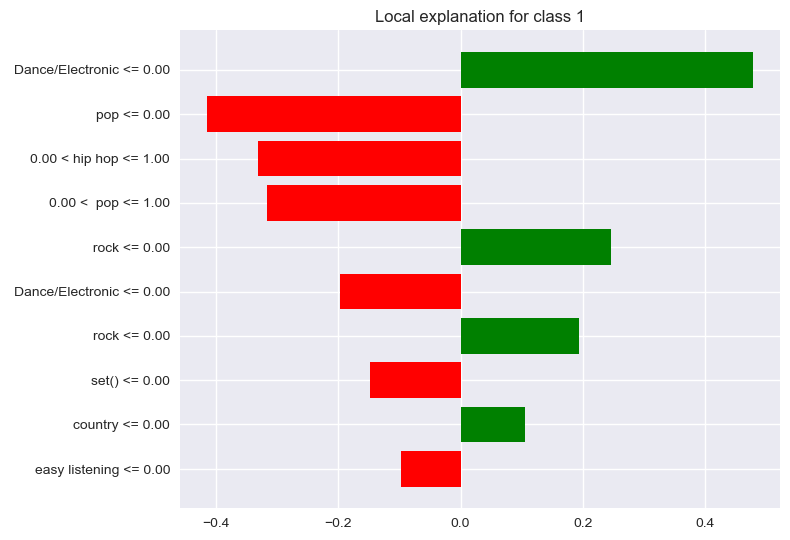

In [51]:
import lime
import lime.lime_tabular

# Create an instance of the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=knn5.classes_, discretize_continuous=True)

# Calculate the LIME explanation for a sample from the test data
exp = explainer.explain_instance(X_valid.iloc[0,:].values, knn5.predict_proba, num_features=10)

# Access the LIME explanation values
lime_values = exp.local_exp[1]

fig = plt.figure(figsize=(12, 8))
exp.as_pyplot_figure()
plt.tight_layout()